## ORO!!! Forecasting

In [1]:
## Importando las librerías
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
dataframeGold = pd.read_csv('gold_price_data.csv')
print(dataframeGold.columns)
dataframeGold.describe()

Index(['Date', 'Value'], dtype='object')


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [4]:
print(dataframeGold.dtypes)
dataframeGold.head(10)

Date      object
Value    float64
dtype: object


,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4
5,1971-04-01,38.9
6,1971-07-01,40.1
7,1971-10-01,42.0
8,1972-01-03,43.5
9,1972-04-03,48.3


In [5]:
etiqueta = np.array(dataframeGold['Value'])[2:]
car_m1 = np.array(dataframeGold['Value'])[1:-1]
car_m2 = np.array(dataframeGold['Value'])[:-2]
print(len(etiqueta))
print(len(car_m1))
print(len(car_m2))

10785
10785
10785


In [6]:
## Agrupando los datos en un único Dataframe y exportándolo a un archivo CSV
dataset = pd.DataFrame({'Carac menos 2':car_m2, 'Carac menos 1':car_m1, 'Etiqueta':etiqueta})
dataset.to_csv('goldPriceArranged.csv')

In [8]:
## Pasando los datos a una matriz de tipo numpy
matrizDatos = dataset.to_numpy()
print(matrizDatos)

[[  35.2    35.1    35.4 ]
 [  35.1    35.4    36.2 ]
 [  35.4    36.2    37.4 ]
 ...
 [1672.5  1655.7  1653.75]
 [1655.7  1653.75 1570.7 ]
 [1653.75 1570.7  1562.8 ]]


In [9]:
def funcCosto(arr_1, arr_2):
  J = np.power(arr_1-arr_2,2)
  return np.sum(J)/(2*len(J))

In [38]:
## Pasos GridSearch
#  h(x) = T0*x0 + T1*x1

# 1. Valores a T0 a T1
dict_resultados = dict()
for T0 in np.arange(0,2,1/200):
  for T1 in np.arange(0,2,1/200):

#   2. Encuentras h(x)
    h_x = T0*matrizDatos[:,0] + T1*matrizDatos[:,1]

#   3. Evalúar la función de costo
    dict_resultados[(T0,T1)]=funcCosto(h_x,matrizDatos[:,2])
    # print(dict_resultados)
# 4. Encontrar el menor
parameters = list(dict_resultados.keys())
print(parameters)
costValues = np.array(list(dict_resultados.values()))
print(costValues)
indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]
print("Los mejores parámetros son:",bestParameters,"donde la función de costo retornó: ",costValues[indexMinCost])

[(0.0, 0.0), (0.0, 0.005), (0.0, 0.01), (0.0, 0.015), (0.0, 0.02), (0.0, 0.025), (0.0, 0.03), (0.0, 0.035), (0.0, 0.04), (0.0, 0.045), (0.0, 0.05), (0.0, 0.055), (0.0, 0.06), (0.0, 0.065), (0.0, 0.07), (0.0, 0.075), (0.0, 0.08), (0.0, 0.085), (0.0, 0.09), (0.0, 0.095), (0.0, 0.1), (0.0, 0.105), (0.0, 0.11), (0.0, 0.115), (0.0, 0.12), (0.0, 0.125), (0.0, 0.13), (0.0, 0.135), (0.0, 0.14), (0.0, 0.145), (0.0, 0.15), (0.0, 0.155), (0.0, 0.16), (0.0, 0.165), (0.0, 0.17), (0.0, 0.17500000000000002), (0.0, 0.18), (0.0, 0.185), (0.0, 0.19), (0.0, 0.195), (0.0, 0.2), (0.0, 0.20500000000000002), (0.0, 0.21), (0.0, 0.215), (0.0, 0.22), (0.0, 0.225), (0.0, 0.23), (0.0, 0.23500000000000001), (0.0, 0.24), (0.0, 0.245), (0.0, 0.25), (0.0, 0.255), (0.0, 0.26), (0.0, 0.265), (0.0, 0.27), (0.0, 0.275), (0.0, 0.28), (0.0, 0.28500000000000003), (0.0, 0.29), (0.0, 0.295), (0.0, 0.3), (0.0, 0.305), (0.0, 0.31), (0.0, 0.315), (0.0, 0.32), (0.0, 0.325), (0.0, 0.33), (0.0, 0.335), (0.0, 0.34), (0.0, 0.34500000

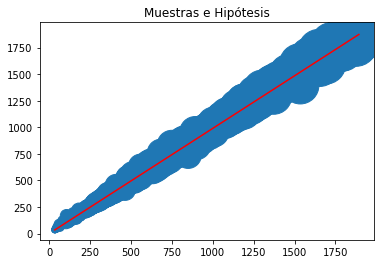

In [39]:
plt.scatter(matrizDatos[:,0], matrizDatos[:,1], matrizDatos[:,2])
x = np.arange(matrizDatos[:,0].min(),matrizDatos[:,0].max(),(matrizDatos[:,0].max()-matrizDatos[:,0].min())/1000)
plt.plot(x,bestParameters[0]+bestParameters[1]*x,'r-')
plt.title("Muestras e Hipótesis")
plt.show()

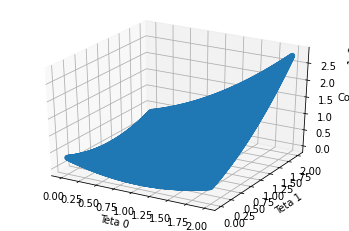

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D([p[0] for p in parameters],[p[1] for p in parameters],list(dict_resultados.values()))
ax.set_xlabel('Teta 0')
ax.set_ylabel('Teta 1')
ax.set_zlabel('Cost');